## Read/check HRES_PREP Data

This script validates various preprocessing stages for HRES data, including checking original data, preprocessing steps, and ensuring data integrity during merging processes.

In [1]:
# import libraries and directories
from py_env_hpc import *

### 1. Check the original HRES data (files in `HRES_OR`)

- Check the values, time, and number of steps (e.g. 91)


In [3]:
file=sorted(os.listdir(HRES_OR))[1]
print(file)
data = xr.open_dataset(HRES_OR+"/"+file)
data
data["tp"][:, 100, 100].values
#data["tp"][:, 100, 100].time
#data["tp"][:, 100, 100].values.shape

#print("OK")

ADAPTER_DE05_20210101.12.0-90-1.boundary_1.nc


array([7.45058060e-09, 3.59557569e-04, 8.00170004e-04, 1.22831017e-03,
       1.57123059e-03, 1.78945810e-03, 1.93286687e-03, 2.09289789e-03,
       2.31735408e-03, 2.66443938e-03, 3.12583148e-03, 3.50616872e-03,
       3.90520692e-03, 4.21904027e-03, 4.53286618e-03, 4.74070013e-03,
       4.96100634e-03, 5.21040708e-03, 5.45149297e-03, 5.74662164e-03,
       6.08954579e-03, 6.27867505e-03, 6.33271411e-03, 6.35349751e-03,
       6.40753284e-03, 6.51976466e-03, 6.69018924e-03, 6.97699934e-03,
       7.45917484e-03, 8.02863762e-03, 8.39858502e-03, 8.50458071e-03,
       8.56693089e-03, 8.61057639e-03, 8.64590704e-03, 8.66045430e-03,
       8.68123770e-03, 8.72280449e-03, 8.76644999e-03, 8.95557925e-03,
       9.67052951e-03, 1.02628581e-02, 1.06411129e-02, 1.09216906e-02,
       1.13726892e-02, 1.21395998e-02, 1.32328048e-02, 1.41223371e-02,
       1.44527927e-02, 1.45795718e-02, 1.46356858e-02, 1.46855675e-02,
       1.47375241e-02, 1.47645436e-02, 1.47957206e-02, 1.48102678e-02,
      

### 2. Check the preprocessed data in the first step (files in `HRES_DUMP`)

Step 1) deltat, mulc, unit, selname

- Check the values, time, and number of steps (e.g. 90)

In [4]:
file=sorted(os.listdir(HRES_DUMP))[0]
print(file)
data = xr.open_dataset(HRES_DUMP+"/"+file)
#data
data["pr"][:, 100, 100].values
#data.time[:]

#print("OK")

ADAPTER_DE05_20210101.12.0-90-1.boundary_1.nc.deltat.mulc.unit.chname.selname.nc


array([0.35955307, 0.44060839, 0.42813834, 0.34292634, 0.21822585,
       0.14340556, 0.16003229, 0.22446088, 0.34708302, 0.46139181,
       0.38033649, 0.39904156, 0.31382956, 0.31382956, 0.20783415,
       0.2203042 , 0.24940098, 0.24108761, 0.29512449, 0.34292634,
       0.18912907, 0.05403688, 0.02078341, 0.05403688, 0.11223044,
       0.170424  , 0.28681112, 0.48217522, 0.56946556, 0.36994478,
       0.10599541, 0.06235024, 0.04364517, 0.0353318 , 0.01454839,
       0.02078341, 0.04156683, 0.04364517, 0.18912907, 0.71494946,
       0.59232732, 0.37825815, 0.2805761 , 0.4510001 , 0.766908  ,
       1.09320761, 0.88953015, 0.33045629, 0.12677883, 0.05611522,
       0.0498802 , 0.05195854, 0.02701844, 0.03117512, 0.01454839,
       0.02078341, 0.01662673, 0.00415668, 0.01662673, 0.00415668,
       0.00623502, 0.01662673, 0.01662673, 0.01662673, 0.02286176,
       0.        , 0.01039171, 0.00415668, 0.        , 0.        ,
       0.01039171, 0.03117512, 0.03948849, 0.01662673, 0.01662

### 3. Check the preprocessed data in the second step (files in `HRES_DUMP2`)

Step 2) Merge all three forecast files by date

- Check the matadata and attributes look fine.

In [5]:
file=sorted(os.listdir(HRES_DUMP2))[0]
print(file)
data = xr.open_dataset(HRES_DUMP2+"/"+file)
data
#data["pr"][:, 100, 100].values
#data.time[:]

#print("OK")

ADAPTER_DE05_20210101.merged.nc


<xarray.Dataset>
Dimensions:    (time: 124, longitude: 196, latitude: 125)
Coordinates:
  * time       (time) datetime64[ns] 2021-01-01T13:00:00 ... 2021-01-11T12:00:00
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
Data variables:
    pr         (time, latitude, longitude) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      2021-01-01 18:37:52 GMT by grib_to_netcdf-2.19.1: grib_to_n...
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

### 4. Check the preprocessed data in the third step (files in `HRES_DUMP3`)

Step 3) Pick the forecast data per day for each date

- Check the matadata and attributes look fine.

In [15]:
file=sorted(os.listdir(HRES_DUMP3))[9]
print(file)
data = xr.open_dataset(HRES_DUMP3+"/"+file)
#data
#data["pr"][:, 100, 100].values
#data.time[:]

file=sorted(os.listdir(HRES_DUMP3))[0]
print(file)
data = xr.open_dataset(HRES_DUMP3+"/"+file)
#data
data["pr"][:, 100, 100].values
#data.time[:50].values
#data.pr[:50].values

#print("OK")

ADAPTER_DE05_20210101.merged.nc.ref.nc
ADAPTER_DE05_20210101.merged.nc.day10.nc


array([ 0.35129972,  0.01285243,  0.02570486, -0.00428414])

### 5. Check the preprocessed data in the fourth step (files in `HRES_DUMP4`)

Step 4) Merge day and ref files (ref, day2, day3, ..., day10)

- Check the matadata and attributes look fine.

In [22]:
file=sorted(os.listdir(HRES_DUMP4))[1]
print(file)
data = xr.open_dataset(HRES_DUMP4+"/"+file)
#data
#data["pr"][:, 100, 100].values
data.time[:6]

#print("OK")

ADAPTER_DE05.day10.merged.nc


<xarray.DataArray 'time' (time: 6)>
array(['2021-01-10T18:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-11T06:00:00.000000000', '2021-01-11T12:00:00.000000000',
       '2021-01-11T18:00:00.000000000', '2021-01-12T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-01-10T18:00:00 2021-01-11 ... 2021-01-12
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

/tmp/ipykernel_15339/3557468005.py:8: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  return np.abs(geo_vals - geo).argmin()
/tmp/ipykernel_15339/3557468005.py:8: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  return np.abs(geo_vals - geo).argmin()


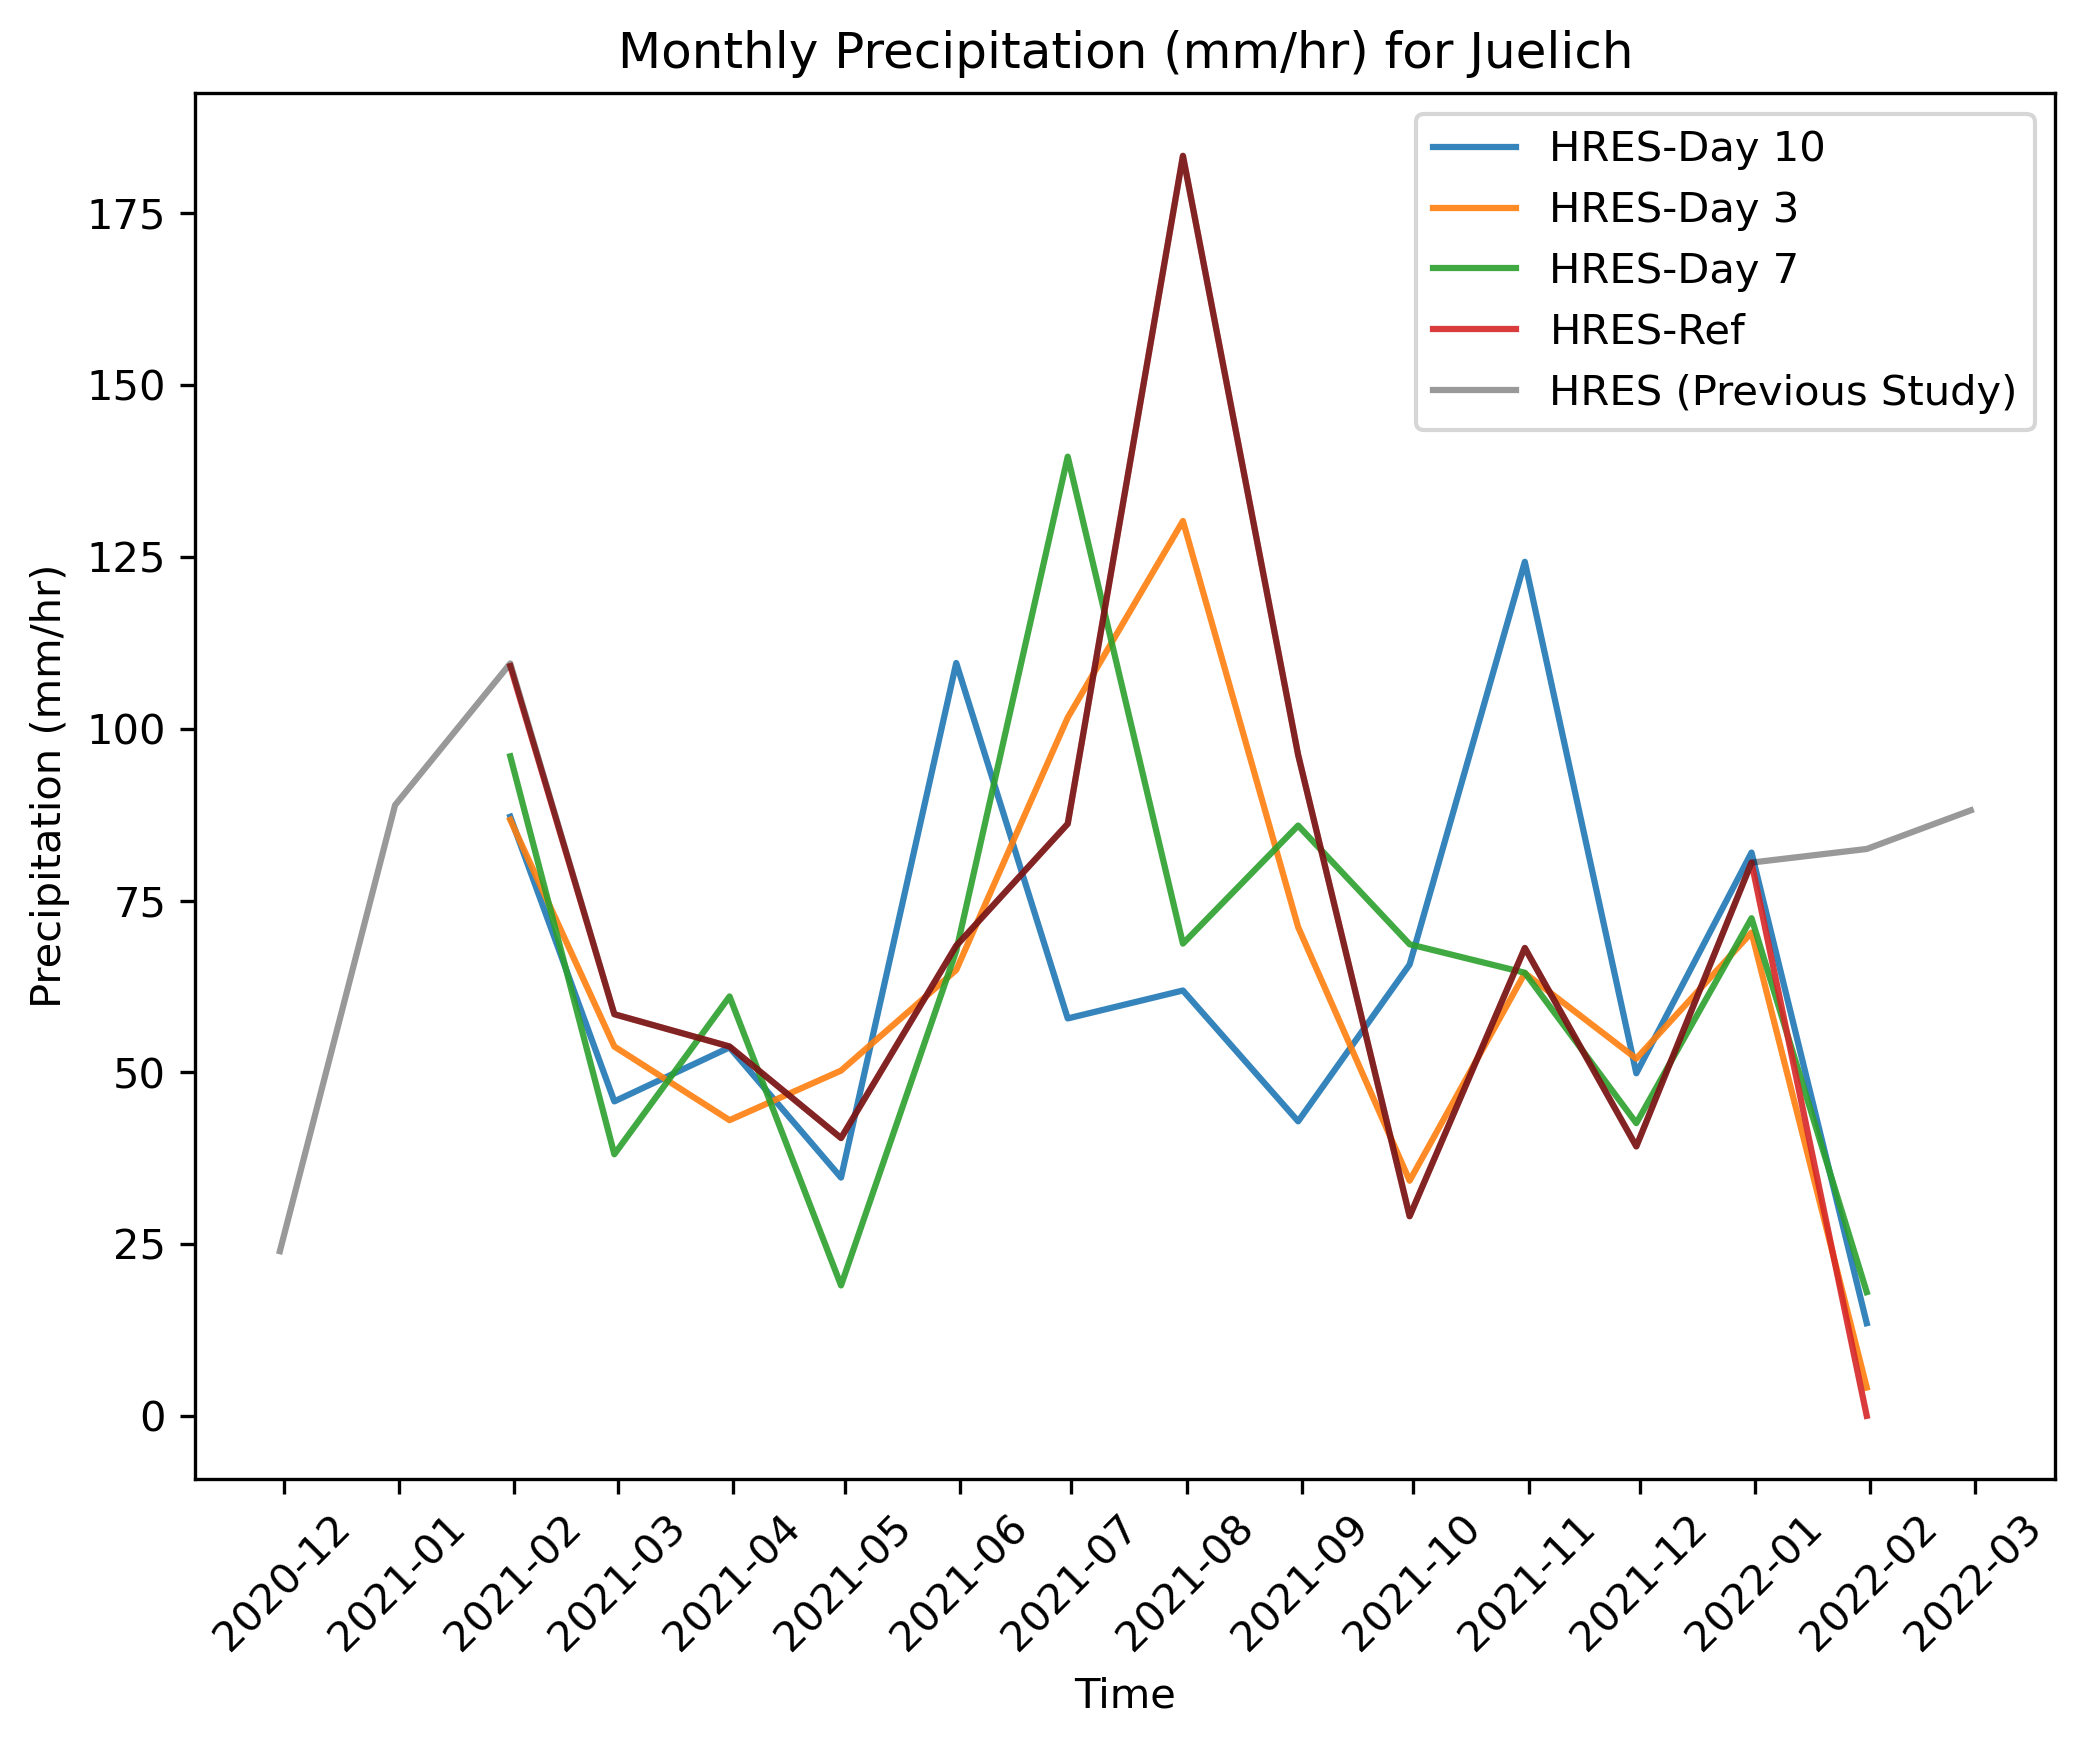

OK


In [30]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def geo_idx(geo, geo_vals):
    return np.abs(geo_vals - geo).argmin()

# from previous study (HSAF-HRES)
old_file_loc = '/p/scratch/deepacf/kiste/patakchiyousefi1/H_RES_PP/HRES_PP_202007_202304.nc'
old_data = xr.open_dataset(old_file_loc)
old_data_resampled = old_data.resample(time='1M').sum()

in_lat = 50.91
in_lon = 6.35

# Find the nearest indices
lat_idx = geo_idx(in_lat, lats)
lon_idx = geo_idx(in_lon, lons)

plt.figure(figsize=(8, 6), dpi=300)

for i in [1, 3, 7, 10]:
    
    label=f'HRES-Day {i}'
    if i == 10:
        label=f'HRES-Ref'
    if i == 1:
        label=f'HRES-Day 10'
    file = sorted(os.listdir(HRES_DUMP4))[i]
    data = xr.open_dataset(os.path.join(HRES_DUMP4, file))
    data_resampled = data.resample(time='1M').sum()
    
    plt.plot(data_resampled["time"], data_resampled["pr"][:, lat_idx, lon_idx], label=label, alpha=0.9)

plt.plot(old_data_resampled["time"][4:20], old_data_resampled["pr"][4:20, lat_idx, lon_idx], label='HRES (Previous Study)', alpha=0.4, color="black")

plt.title("Monthly Precipitation (mm/hr) for Juelich")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm/hr)")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()
print("OK")

### 6. Check the preprocessed data (`HRES_PREP`)

- Check the matadata and attributes look fine.

In [34]:
file=sorted(os.listdir(HRES_PREP))[1]
print(file)
data = xr.open_dataset(HRES_PREP+"/"+file)
data
#data["pr"][:, 100, 100].values
#data.time[:6]

print("OK")

ADAPTER_DE05.day10.merged.nc
OK
